# Advanced Machine Learning
## Exercise Sheet 9

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from KarlBoost import KarlBoost

## Playing around

In [49]:
X, Y = make_circles(n_samples=1_000, noise=0.2, factor=0.2)

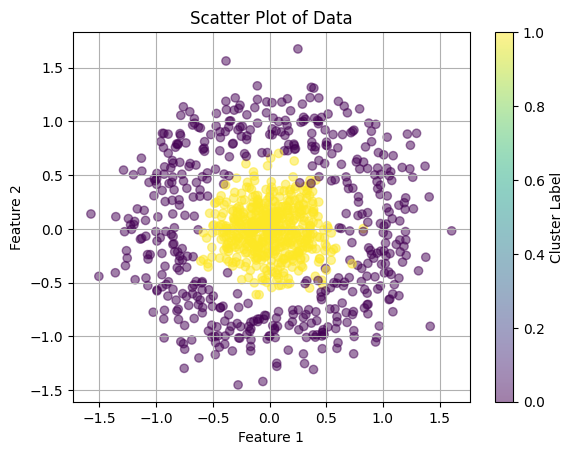

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.5, cmap='viridis')

plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

In [63]:
max_depth = 4

clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
clf.fit(X, Y)

DecisionTreeClassifier(max_depth=4)

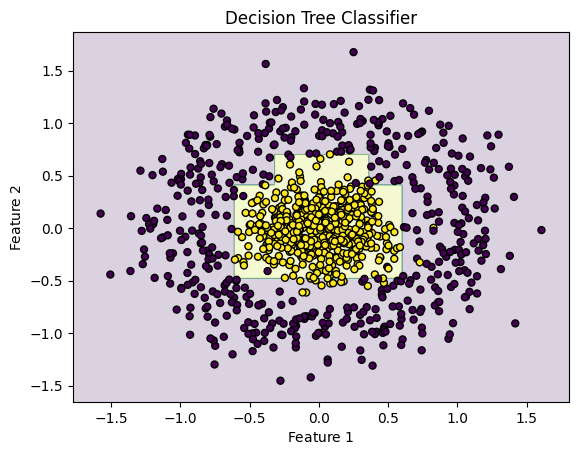

In [64]:
# Create a mesh grid
pad = 0.2
x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)

# Overlay the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, s=25, edgecolor='k')
plt.title('Decision Tree Classifier')
plt.xlabel('Feature $1$')
plt.ylabel('Feature $2$')
plt.show()

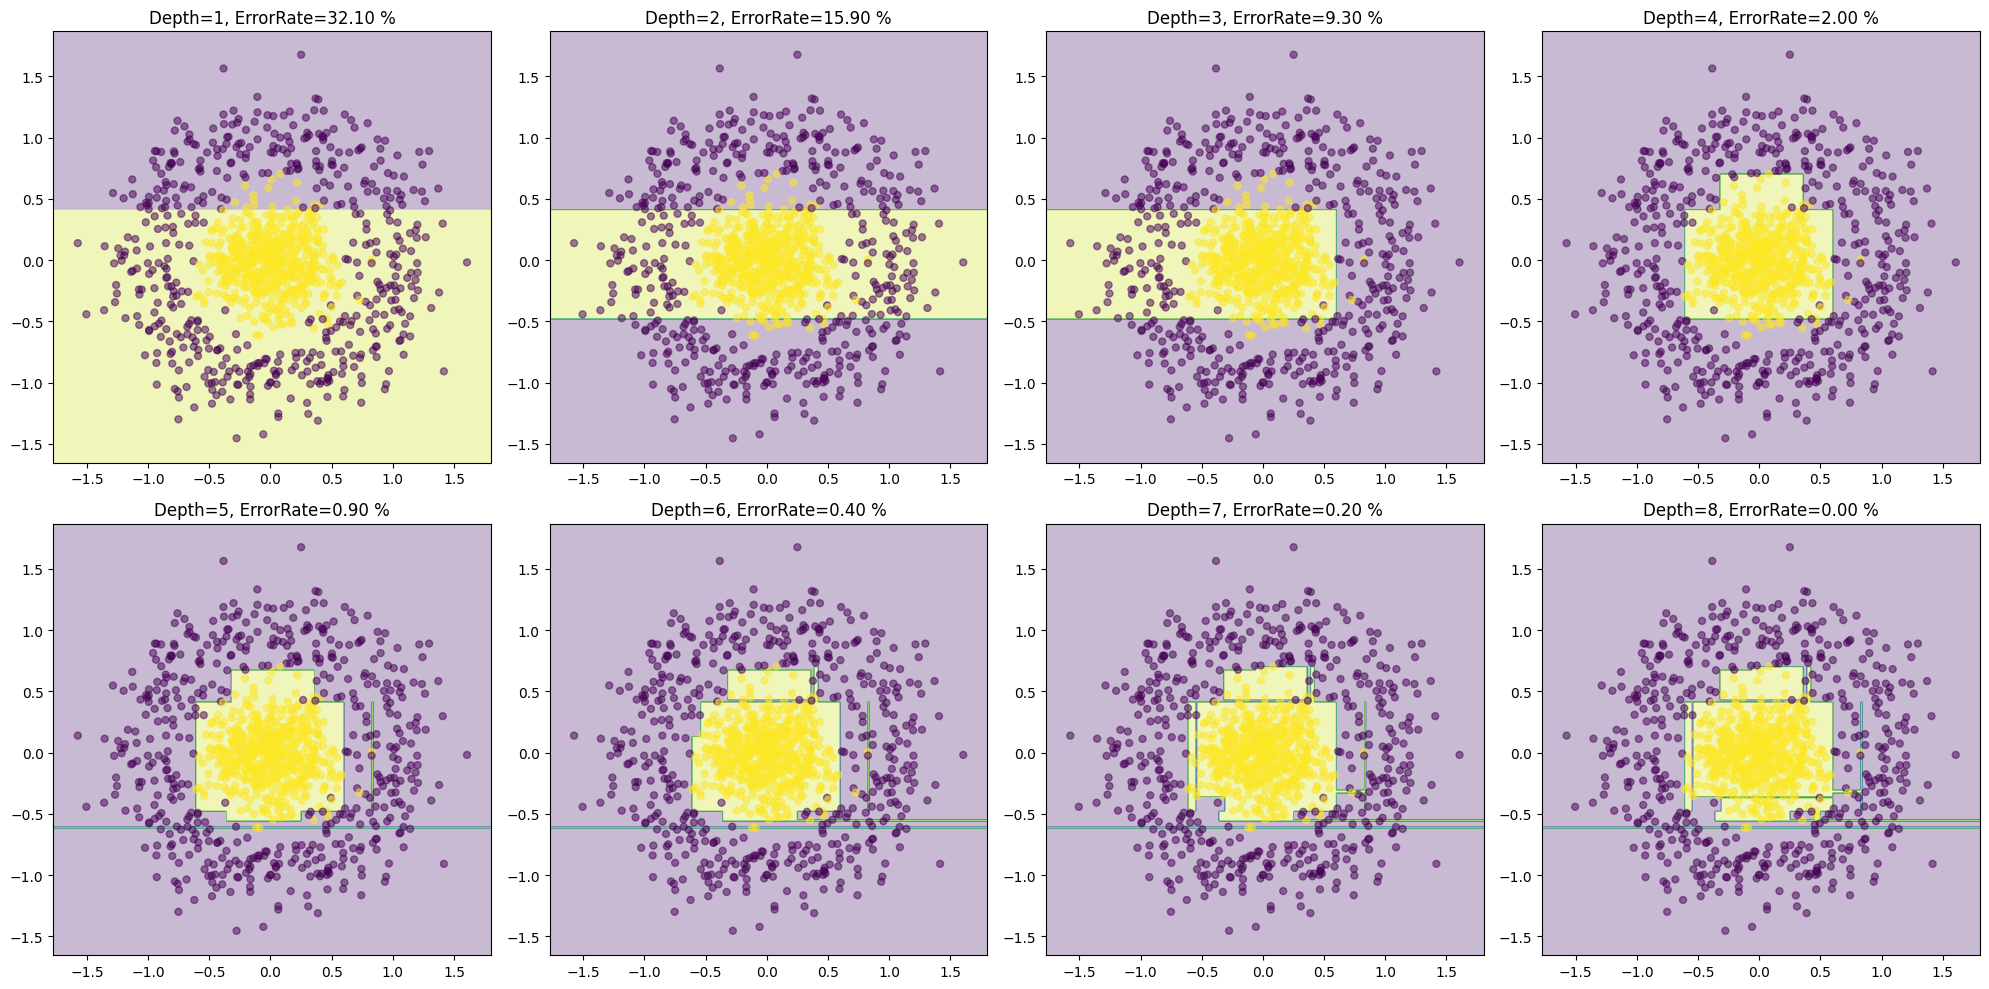

In [72]:
# Corrected code to plot decision boundaries

# Initialize the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns for the subplots

# Iterate through different depths and plot each decision tree
for i, ax in enumerate(axs.flatten()):
    # Train classifier for the current depth
    max_depth = i + 1
    clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    clf.fit(X, Y)
    error_rate = 1 - accuracy_score(Y, clf.predict(X))

    # Predict class for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3)

    # Overlay the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=25, alpha=0.5)
    # ax.set_title(f'Decision Tree Classifier (max_depth={max_depth})')
    ax.set_title(f"Depth={max_depth}, ErrorRate={error_rate*100:.2f} %")
    # ax.set_xlabel('Feature $1$')
    # ax.set_ylabel('Feature $2$')

plt.tight_layout()
plt.show()

In [42]:
clf = AdaBoostClassifier(n_estimators=1)
clf.fit(X, Y)

AdaBoostClassifier(n_estimators=1)

## Exercise 2

In [ ]:
n_estimators = 5


In [ ]:
clf_karl = KarlBoost(n_estimators=n_estimators)
clf_karl.fit()

clf_sklearn = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')
clf_sklearn.fit()

In [ ]:
clf_sklearn = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')